In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures


In [2]:
data = pd.read_csv("VideoGamesSales.csv")

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [10]:
data.isnull().sum()


Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6704
User_Count            0
Developer          6623
Rating             6769
dtype: int64

In [9]:
data = data.fillna(data.mean())



In [11]:
data["User_Score"]

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16714    NaN
16715    NaN
16716    NaN
16717    NaN
16718    NaN
Name: User_Score, Length: 16719, dtype: object

In [12]:
type(data["Year_of_Release"][0])
data["Year_of_Release"] = data["Year_of_Release"].fillna(0).astype(int)
data["Year_of_Release"]

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16714    2016
16715    2006
16716    2016
16717    2003
16718    2016
Name: Year_of_Release, Length: 16719, dtype: int64

In [13]:
data["Year_of_Release"].mode()

data["Year_of_Release"]=data["Year_of_Release"].replace([0], 2008)
freq = data.groupby(["Year_of_Release"]).count() 
freq

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Year_of_Release,,,,,,,,,,,,,,,
1980,9,9,9,9,9,9,9,9,9,9,9,0,9,0,0
1981,46,46,46,46,46,46,46,46,46,46,46,0,46,0,0
1982,36,36,36,36,36,36,36,36,36,36,36,0,36,0,0
1983,17,17,17,17,17,17,17,17,17,17,17,0,17,0,0
1984,14,14,14,14,14,14,14,14,14,14,14,0,14,0,0
1985,14,14,14,14,14,14,14,14,14,14,14,1,14,1,1
1986,21,21,21,21,21,21,21,21,21,21,21,0,21,0,0
1987,16,16,16,16,16,16,16,16,16,16,16,0,16,0,0
1988,15,15,15,15,15,15,15,15,15,15,15,1,15,1,1


## Simple linear regression 

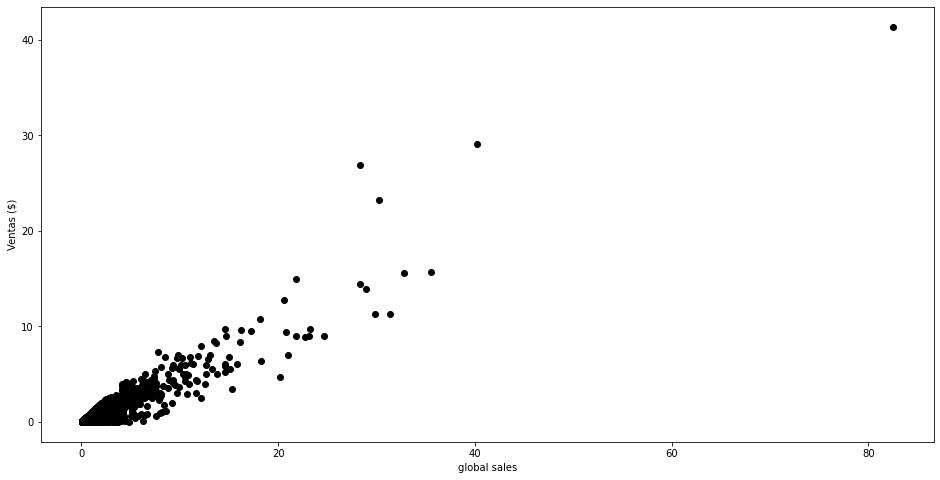

In [14]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['Global_Sales'],
    data['NA_Sales'],
    c='black'
)
plt.xlabel("global sales")
plt.ylabel("Ventas ($)")
plt.show()

In [15]:
X = data['Global_Sales'].values.reshape(-1,1)
y = data['NA_Sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [16]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

0.49454595577185817
-0.0005310299223462711
The linear model is: Y = -0.00053103 + 0.49455X


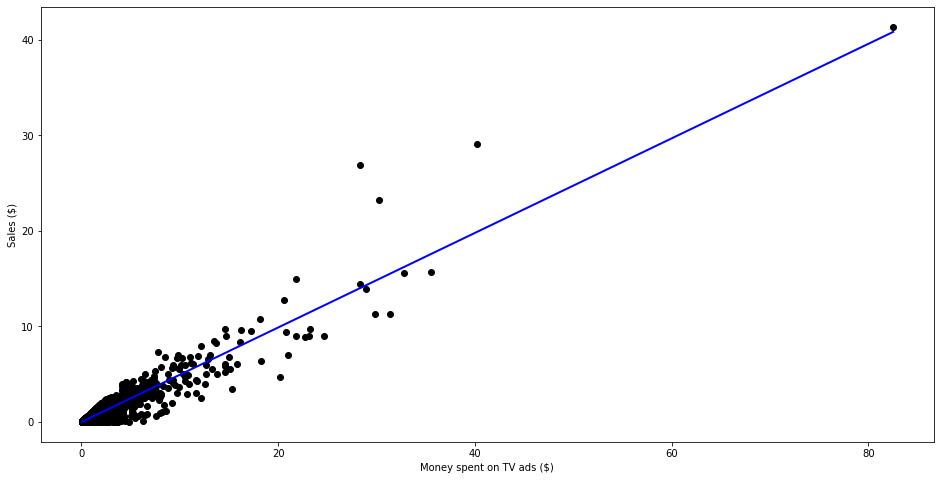

In [17]:
predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(
    data['Global_Sales'],
    data['NA_Sales'],
    c='black'
)
plt.plot(
    data['Global_Sales'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [18]:
X = data['Global_Sales']
y = data['NA_Sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               NA_Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 1.293e+05
Date:                Fri, 11 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:58:08   Log-Likelihood:                -2155.5
No. Observations:               16719   AIC:                             4315.
Df Residuals:                   16717   BIC:                             4330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0005      0.002     -0.236   

## Multiple linear regression 

In [19]:
'tbd' in data['User_Score'].values 
#'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
 #      'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
  #     'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'

True

In [21]:
Xs = data.drop(['NA_Sales','Name','Platform','Genre','Publisher', 'Developer','Rating','User_Score'], axis=1)
y = data['NA_Sales']#.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs, y)

LinearRegression()

In [22]:
print(reg.coef_)
print(reg.intercept_)

[ 2.80465684e-06 -9.99912794e-01 -9.99895715e-01 -9.99553635e-01
  9.99998205e-01  1.49123432e-06  8.46046043e-06  1.65645322e-09]
-0.0062481397538560746


In [23]:
reg.score(Xs, y)

0.9999590158850672

In [24]:
X = np.column_stack((data['EU_Sales'], data['Global_Sales'], data['Critic_Score']))
y = data['NA_Sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               NA_Sales   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 6.583e+04
Date:                Fri, 11 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:02:44   Log-Likelihood:                 1049.4
No. Observations:               16719   AIC:                            -2091.
Df Residuals:                   16715   BIC:                            -2060.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0196      0.013     -1.539      0.1

### Interaction terms

In [25]:
# Create interaction term (not polynomial features)
interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X)
#X_test_inter = interaction.fit_transform(X_test)

In [26]:
X2 = sm.add_constant(X_inter)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               NA_Sales   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 2.883e+04
Date:                Fri, 11 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:02:58   Log-Likelihood:                 1219.1
No. Observations:               16719   AIC:                            -2422.
Df Residuals:                   16711   BIC:                            -2360.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0537      0.014     -3.768      0.0